In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plt
import numpy as np
from qiskit.providers.ibmq import least_busy
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [9]:
n = 2
grov_circuit = QuantumCircuit(2)

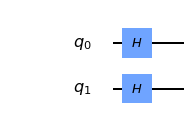

In [10]:
for qubit in range(n):
    grov_circuit.h(qubit)
grov_circuit.draw('mpl')

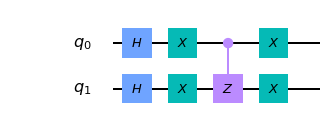

In [11]:
for qubit in range(n):
    grov_circuit.x(qubit)

grov_circuit.cz(0, 1)

for qubit in range(n):
    grov_circuit.x(qubit)

grov_circuit.draw('mpl')


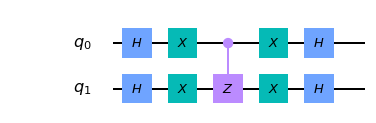

In [13]:
for qubit in range(n):
    grov_circuit.h(qubit)
grov_circuit.draw('mpl')

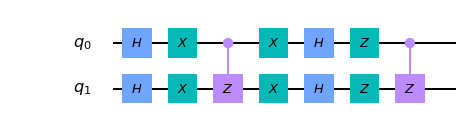

In [14]:
for qubit in range(n):
    grov_circuit.z(qubit)
grov_circuit.cz(0, 1)

grov_circuit.draw('mpl')

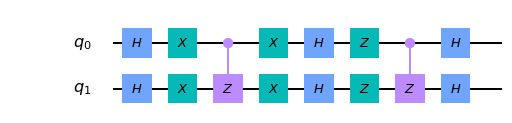

In [15]:
for qubit in range(n):
    grov_circuit.h(qubit)

grov_circuit.draw('mpl')

In [16]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grov_circuit, backend_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")


$$ |\psi\rangle =\begin{bmatrix}
1 \\
0 \\
0 \\
0\end{bmatrix} $$

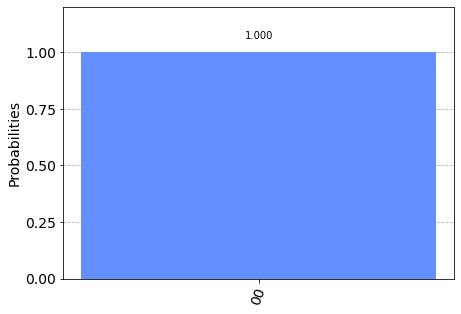

In [17]:
grov_circuit.measure_all()
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grov_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [18]:
provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_rome


In [20]:
from qiskit.tools.monitor import job_monitor
job = execute(grov_circuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


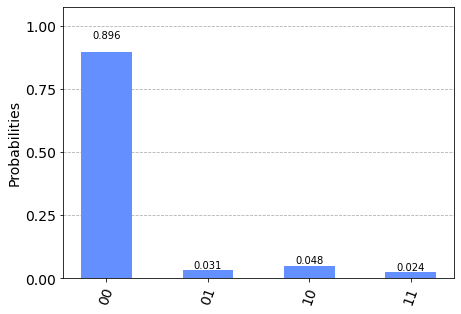

In [21]:
results = job.result()
answer = results.get_counts(grov_circuit)
plot_histogram(answer)

In [22]:
##Now running 3-bit Grover's Algorithm

In [23]:
def phase_oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)

In [24]:
def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    
    for q in range(nqubits):
        circuit.x(q)
        circuit.h(q)

In [25]:
n = 3
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit)

grover_circuit.measure_all()

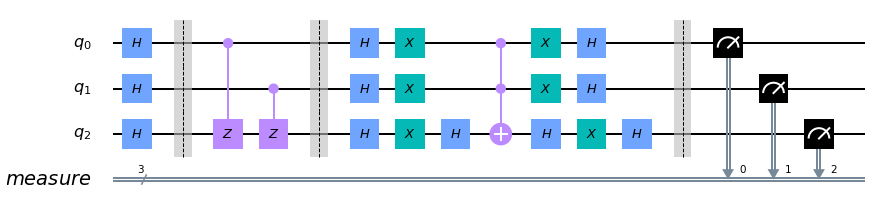

In [26]:
grover_circuit.draw(output="mpl")

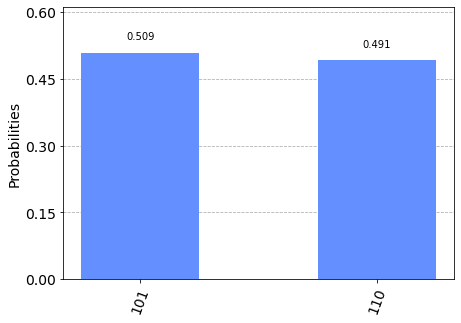

In [27]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [28]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_rome


In [33]:
from qiskit.tools.monitor import job_monitor

shots = 2048
job = execute(grover_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


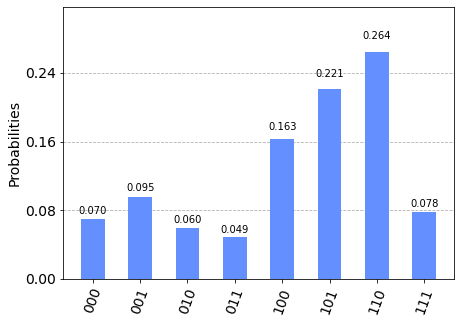

In [35]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)